# Математическая статистика
## Практическое задание 2

В данном задании рассматриваются различные свойства оценок, методы получения оценок, способы сравнения оценок.

**Правила:**

* Выполненную работу нужно отправить на почту `probability.diht@yandex.ru`, указав тему письма `"[номер группы] Фамилия Имя - Задание 2"`. Квадратные скобки обязательны. Вместо `Фамилия Имя` нужно подставить свои фамилию и имя.
* Прислать нужно ноутбук и его pdf-версию. Названия файлов должны быть такими: `2.N.ipynb` и `2.N.pdf`, где `N` - ваш номер из таблицы с оценками.
* Никакой код из данного задания при проверке запускаться не будет.
* Некоторые задачи отмечены символом <font size="5" color="red">\*</font>. Эти задачи являются дополнительными. Успешное выполнение большей части таких задач (за все задания) является необходимым условием получения бонусного балла за практическую часть курса.
* Баллы за каждую задачу указаны далее. Если сумма баллов за задание меньше 25% (без учета доп. задач), то все задание оценивается в 0 баллов.


**Баллы за задание:**

* Задача 1 - 3 балла
* Задача 2 - 3 балла
* Задача 3 - 3 балла
* Задача 4 - 2 балла
* Задача 5 - 2 балла
* Задача 6 - 3 балла
* Задача 7а - 3 балла
* Задача 7b<font size="5" color="red">\*</font> - 5 баллов
* Задача 8 - 4 балла
* Задача 9<font size="5" color="red">\*</font> - 4 балла
* Задача 10<font size="5" color="red">\*</font> - 5 баллов


При выполнении задания рекомендуется пользоваться библиотекой `scipy.stats`. Подробное описание есть в наших инструкциях.

In [1]:
import numpy as np
import scipy.stats as sps, scipy as sp
import matplotlib.pyplot as plt

%matplotlib inline

**Задача 1.** В этой задаче нужно визуализировать свойство несмещенности.

Пусть $X_1, ..., X_n$ --- выборка из распределения $U[0, \theta]$. Известно, что в качестве оценки параметра $\theta$ можно использовать следующие оценки $X_{(n)}, \frac{n+1}{n}X_{(n)}, 2\overline{X}$.

**Вопрос:** Какие из этих оценок являются несмещенными?

**Ответ:** 

$ E_\theta X_{(n)} = \int\limits_0^\theta \frac{nx^{n+1}}{\theta^n} dx = \frac{nx^{n+1}}{(n+1)\theta^n} \bigg\rvert_0^\theta = \frac{\theta n}{n+1} \ne \theta$ — оценка смещенная.

$ E_\theta \frac{n+1}{n} X_{(n)} = \frac{n+1}{n} \int\limits_0^\theta \frac{nx^{n+1}}{\theta^n}dx = \frac{n+1}{n} \cdot \frac{nx^{n+1}}{(n+1)\theta^n} \bigg\rvert_0^\theta = \frac{n+1}{n} \cdot \frac{\theta n}{n+1} = \theta$ — оценка несмещённая. 

$ E_\theta 2\overline{X} = 2 E_\theta(X_1+\dots X_n) = \frac{2}{n}\cdot n \cdot E_\theta X_1 = 2 \int\limits_0^\theta \frac{x}{\theta} dx = \frac{x^2}{\theta} \bigg\rvert_0^\theta = \theta$ — оценка несмещённая.

Вам нужно убедиться в этом, сгенерировав множество выборок и посчитав по каждой из них оценку параметра.

Сгенерируйте 500 выборок $X_1^j, ..., X_n^j$ из распределения $U[0, 1]$, по каждой из них посчитайте оценку $\widehat{\theta}_j$, получив тем самым 500 независимых оценок параметра. Нанесите их на график с одинаковой *у*-координатой. Отметьте специальным символом среднее этих выборок (см. шаблон ниже). Выполните данную процедуру для $n \in \{10, 100, 500\}$.

Для нанесения точек на график используйте следующий шаблон. Для каждой оценки выставите разный *уровень*, чтобы реализации разных оценок не слипались. В качестве *метки* используйте latex-код этой оценки, который можно взять выше в условии этой задачи. Постарайтесь не размножать код, а сделать циклы по типам оценок и по размеру выборки. Естественно, все типы оценок должны быть на одном графике, но для разных $n$ должны быть разные графики.

In [2]:
def estimate_bias(distribution, estimations):
    grid = np.linspace(0, 1, 100)

    for n in (10, 100, 500):
        plt.figure(figsize=(15, 1.5))
        sample = distribution.rvs(size=(500, n))
        for estimation_function, label, color, level in estimations:
            # Для каждой выборки:
            estimation_values = np.apply_along_axis(estimation_function, 1, sample)
            plt.scatter(estimation_values, np.zeros_like(estimation_values) + level, 
                        alpha=0.1, s=100, color=color, label=label)
            plt.scatter(estimation_values.mean(), level, marker='*', s=200, 
                        color='w', edgecolors='black')

        #Для всего графика:
        plt.vlines(1, 0, 1, color='r')
        plt.title('sample size = %d' % n)
        plt.yticks([])
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

        plt.plot()

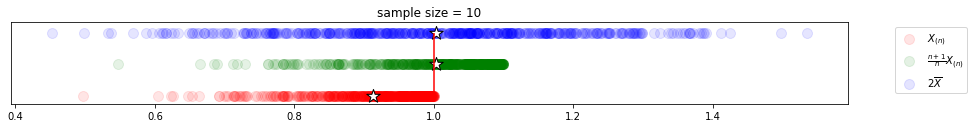

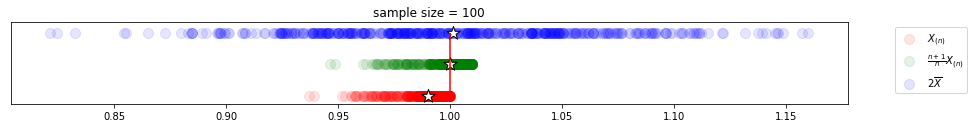

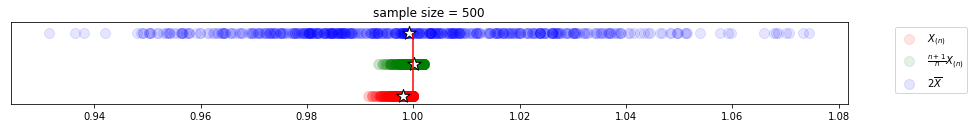

In [3]:
estimations = \
[
    [lambda sample: np.max(sample), '$X_{(n)}$', 'red', 0],
    [lambda sample: (np.size(sample)+1)/np.size(sample)*np.max(sample), '$\\frac{n+1}{n}X_{(n)}$', 'green', 0.5],
    [lambda sample: 2*np.mean(sample), '$2\\overline{X}$', 'blue', 1]
]

estimate_bias(sps.uniform, estimations)

Пусть теперь $X_1, ..., X_n$ --- выборка из распределения $\mathcal{N}(0, \sigma^2)$. Известно, что в качестве оценки параметра $\sigma^2$ можно использовать следующие оценки $S^2, \frac{n}{n-1}S^2$.

**Вопрос:** Какие из этих оценок являются несмещенными?

**Ответ:** 

$ S^2 = \frac{1}{n} \sum\limits_{k=1}{n}(X_k-\overline{X}) = \frac{1}{n} \sum\limits_{k=1}{n}(X_k - \frac{X_1+\dots+X_n}{n})^2 = \frac{1}{n} \sum\limits_{k=1}{n} X_k^2 - \frac{1}{n^2} \sum\limits_{k=1}{n} X_k(X_1+\dots+X_n) + \frac{1}{n^2} (X_1+\dots+X_n)^2 = $

$= \frac{1}{n} \sum\limits_{k=1}{n}X_k^2 - \frac{2}{n^2}(X_1+\dots + X_n)^2+\frac{1}{n^2}(X_1+\dots + X_n)^2 =$

$= \frac{1}{n} \sum\limits_{k=1}{n}X_k^2 - \frac{1}{n^2}(X_1+\dots + X_n)^2 = \overline{X^2}-\overline{X}^2$

$E_\theta S^2 = E_\theta(\overline{X^2}-\overline{X}^2) = \frac{1}{n}E_\theta(X_1^2+\dots+X_n^2)-E_\theta(\frac{X_1+\dots+X_n}{n})^2 = E_\theta X_1^2-\frac{1}{n^2}E_\theta nX^2-\frac{2}{n^2} \cdot \frac{n(n-1)}{2} E_\theta X_iX_j I(i \ne j) = $
$ = \frac{n-1}{n}E_\theta X^2-\frac{n-1}{n}(E_\theta X)^2 = \frac{n-1}{n} D_\theta X$ — оценка смещённая.

$\frac{n}{n-1} E_\theta S^2 = \frac{n}{n-1} \cdot \frac{n-1}{n} D_\theta X = D_\theta X$ — оценка несмещённая.

Для данной модели выполните те же действия, что и с предыдущей.

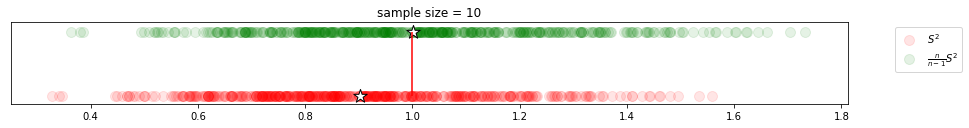

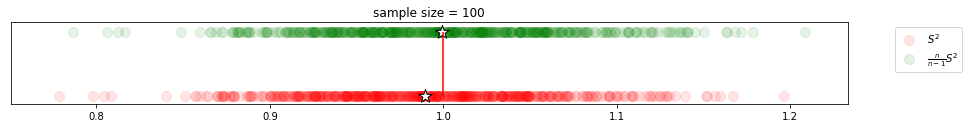

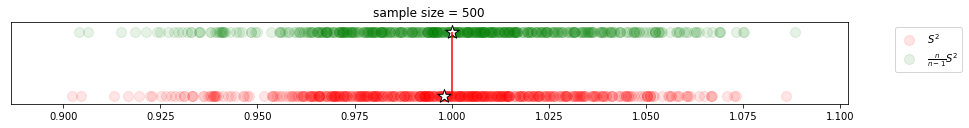

In [4]:
estimations = \
[
    [lambda sample: np.std(sample), '$S^2$', 'red', 0],
    [lambda sample: np.size(sample)/(np.size(sample)-1)*np.std(sample), '$\\frac{n}{n-1}S^2$', 'green', 1]
]

estimate_bias(sps.norm, estimations)

Сделайте вывод о том, что такое свойство несмещенности. Подтверждают ли сделанные эксперименты свойство несмещенности данных оценок? Поясните, почему в лабораторных по физике при оценке погрешности иногда используют $n-1$ в знаменателе, а не $n$.

**Вывод:** Оценка несмещённая, если матожидание оценки совпадает с самой оценкой. Это подтверждается графиком. В лабораторных по физике используется несмещенная оценка, поскольку при малом количестве измерений $n$ (а почти всегда так и есть) смещенная оценка $S^2$, используемая при расчете погрешности, дает завышенную точность измерений.

**Задача 2.** В этой задаче нужно визуализировать свойство состоятельности.

*a).* Пусть $X_1, ..., X_n$ --- выборка из распределения $\mathcal{N}(\theta, 1)$. Известно, что $\overline{X}$ является состоятельной оценкой параметра $\theta$. Вам нужно убедиться в этом, сгенерировав множество выборок и посчитав по каждой из них оценку параметра в зависимости от размера выборки.

Сгенерируйте 200 выборок $X_1^j, ..., X_{300}^j$ из распределения $\mathcal{N}(0, 1)$. По каждой из них посчитайте оценки $\widehat{\theta}_{jn} = \frac{1}{n}\sum\limits\limits_{i=1}^n X_i^j$ для $1 \leqslant n \leqslant 300$, то есть оценка параметра по первым $n$ наблюдениям $j$-й выборки. При написании кода может помочь вступительное задание.

Для каждого $j$ нанесите на один график зависимость $\widehat{\theta}_{jn}$ от $n$ с помощью `plt.plot`. Каждая кривая должна быть нарисована *одним цветом* с прозрачностью `alpha=0.2`. Поскольку при малых $n$ значения оценок могут быть большими, ограничьте область графика по оси *y* с помощью функции `plt.ylim((min, max))`.

*b).* Пусть $X_1, ..., X_n$ --- выборка из распределения $U[0, \theta]$. Известно, что $X_{(n)}$ является состоятельной оценкой параметра $\theta$. Выполните исследование, аналогичное пункту *a)*, сгенерировав выборки из распределения $U[0, 1]$ и посчитав оценки $\widehat{\theta}_{jn} = \max\limits_{i=1...n}X_i^j$.

Сделайте вывод о том, что такое свойство состоятельности. Подтверждают ли сделанные эксперименты свойство состоятельности данных оценок? Как связаны результаты в пункте *a)* с законом больших чисел?

In [5]:
def visualize_consistency(estimation_values, bounds):
    plt.figure(figsize=(18, 6))
    for j in range(200):
        plt.plot(estimation_values[j], alpha=0.2, color='red') 
    plt.ylim(bounds)
    plt.title('Зависимость $\widehat{\\theta}_{jn}$ от $n$')
    plt.show()

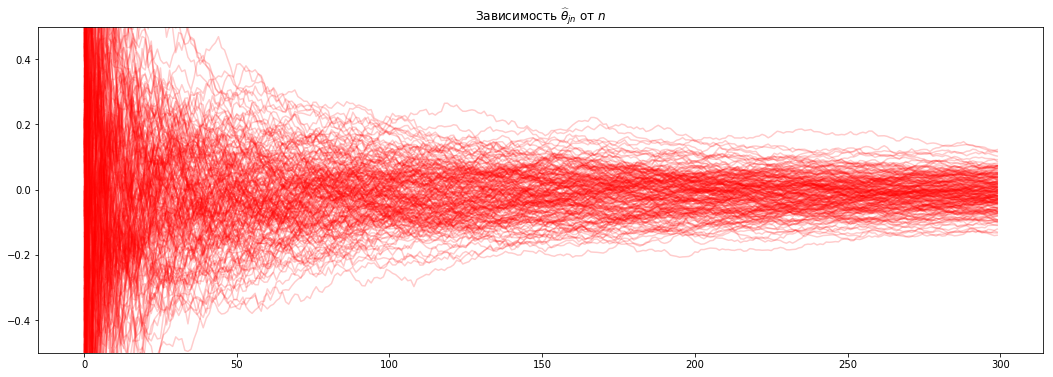

In [6]:
sample = sps.norm.rvs(size=(200, 300))
estimation_values = sample.cumsum(axis=1)/np.tile(np.arange(1, 301, 1.), (200, 1))
visualize_consistency(estimation_values, (-0.5, 0.5))

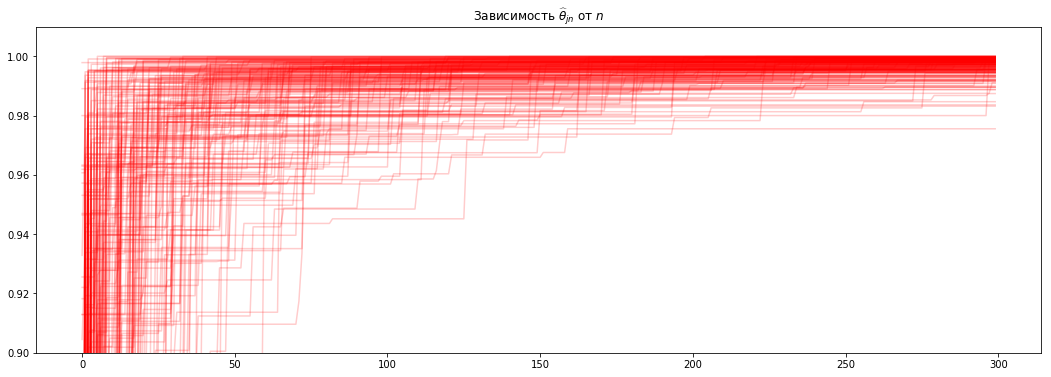

In [7]:
sample = sps.uniform.rvs(size=(200, 300))
estimation_values = np.maximum.accumulate(sample, axis=1)
visualize_consistency(estimation_values, (0.9, 1.01))

**Вывод:** Оценка состоятельна, если при стремящемся к бесконечности $n$ оценка стремится к истинному значению (по вероятности).
На графике видим, что при увеличении $n$ значение оценки начиная с некоторого размера выборки становится близко к истинному значению. 
Результаты в пункте *a)* связаны с законом больших чисел: $\frac{S_n}{n}$ стремится к $0$ при $n \rightarrow \infty$.

**Задача 3.** В этой задаче нужно визуализировать свойство асимптотической нормальности.

*a).* Пусть $X_1, ..., X_n$ --- выборка из распределения $\mathcal{N}(\theta, 1)$. Известно, что $\overline{X}$ является асимптотически нормальной оценкой параметра $\theta$. Вам нужно убедиться в этом, сгенерировав множество выборок и посчитав по каждой из них оценку параметра в зависимости от размера выборки.

Сгенерируйте 200 выборок $X_1^j, ..., X_{300}^j$ из распределения $\mathcal{N}(0, 1)$. По каждой из них посчитайте оценки $\widehat{\theta}_{jn} = \frac{1}{n}\sum\limits\limits_{i=1}^n X_i^j$ для $1 \leqslant n \leqslant 300$, то есть оценка параметра по первым $n$ наблюдениям $j$-й выборки. Для этой оценки посчитайте статистику $T_{jn} = \sqrt{n} \left( \widehat{\theta}_{jn} - \theta \right)$, где $\theta = 0$.

Для каждого $j$ нанесите на один график зависимость $T_{jn}$ от $n$ с помощью `plt.plot`. Каждая кривая должна быть нарисована *одним цветом* с прозрачностью `alpha=0.2`. Сходятся ли значения $T_{jn}$ к какой-либо константе?

Для $n=300$ по выборке $T_{1,300}, ..., T_{200,300}$ постройте гистограмму и ядерную оценку плотности. Хорошо ли они приближают плотность распределения $\mathcal{N}(0, 1)$ (ее тоже постройте на том же графике)? Не забудьте сделать легенду.

*b).* Пусть $X_1, ..., X_n$ --- выборка из распределения $Pois(\theta)$. Известно, что $\overline{X}$ является асимптотически нормальной оценкой параметра $\theta$. Выполните исследование, аналогичное пункту *a)*.

Сделайте вывод о том, что такое свойство асимптотической нормальности. Подтверждают ли сделанные эксперименты свойство асимптотической нормальности данных оценок? Как связаны результаты с центральной предельной теоремой?

In [8]:
from statsmodels.nonparametric.kde import KDEUnivariate

In [9]:
def visualize_asympthotic_normality(sample, grid, statistic_values, pdf):
    plt.figure(figsize=(18, 6))
    for j in range(200):
        plt.plot(statistic_values[j], alpha=0.2, color='red') 
    plt.title('Зависимость $T_{jn}$ от $n$')
    plt.xlabel('$n$', fontsize=16)
    plt.ylabel('$T_{jn}$', fontsize=16)
    plt.show()
    
    # Берём срез по элементу с n=300, как и сказано
    sample = statistic_values[:, -1]
    kernel_density = KDEUnivariate(sample)
    kernel_density.fit()
    
    plt.figure(figsize=(18, 6))
    plt.hist(sample,  bins=20, range=(grid.min(), grid.max()), alpha=0.5, color='green', normed=True)
    plt.plot(grid, pdf(grid), color='red', label='estimated pdf') 
    plt.plot(grid, kernel_density.evaluate(grid), color='blue', label='kde')
    plt.title('Гистограмма, ядерная оценка плотности и приближаемая плотность')

    plt.legend()
    plt.show()

In [10]:
sample = sps.norm.rvs(size=(200, 300))
estimation_values = sample.cumsum(axis=1)/np.tile(np.arange(1, 301, 1.), (200, 1))
statistic_values = estimation_values * np.linspace(1, 300, 300) ** 0.5

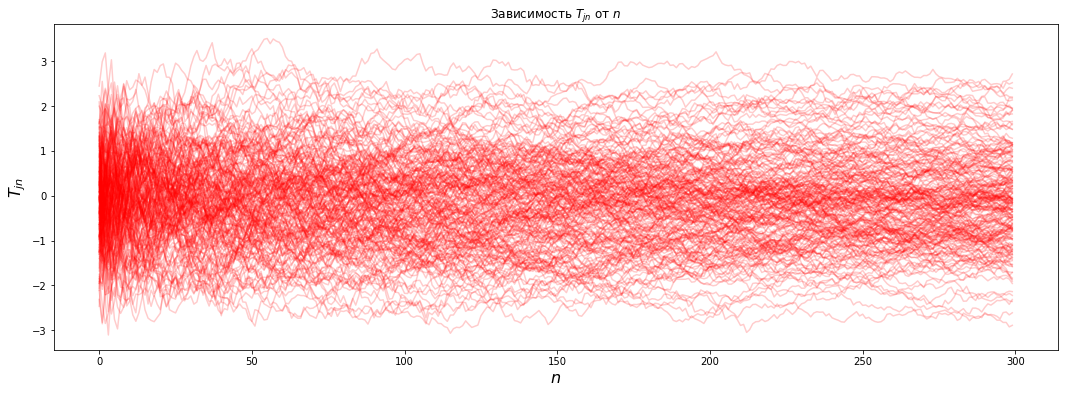

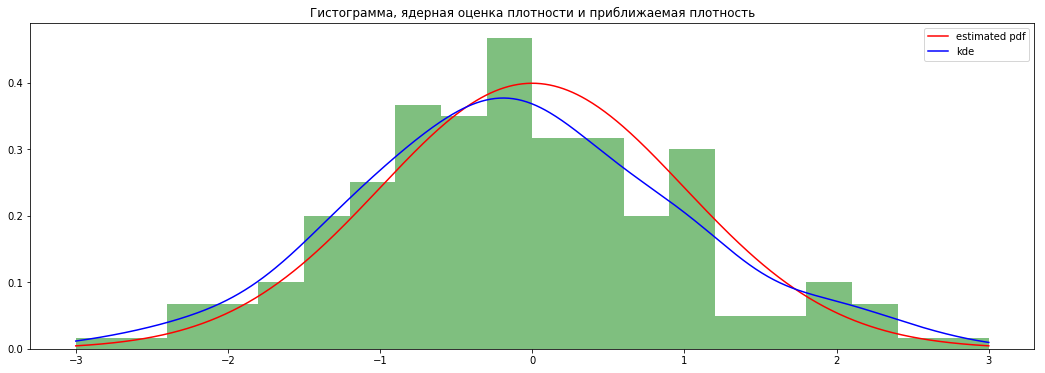

In [11]:
visualize_asympthotic_normality(sample, np.linspace(-3, 3, 600), statistic_values, sps.norm.pdf)

In [12]:
sample = sps.poisson.rvs(mu=1, size=(200, 300))
estimation_values = sample.cumsum(axis=1)/np.tile(np.arange(1, 301, 1.), (200, 1))
statistic_values = (estimation_values - 1) * np.linspace(1, 300, 300) ** 0.5

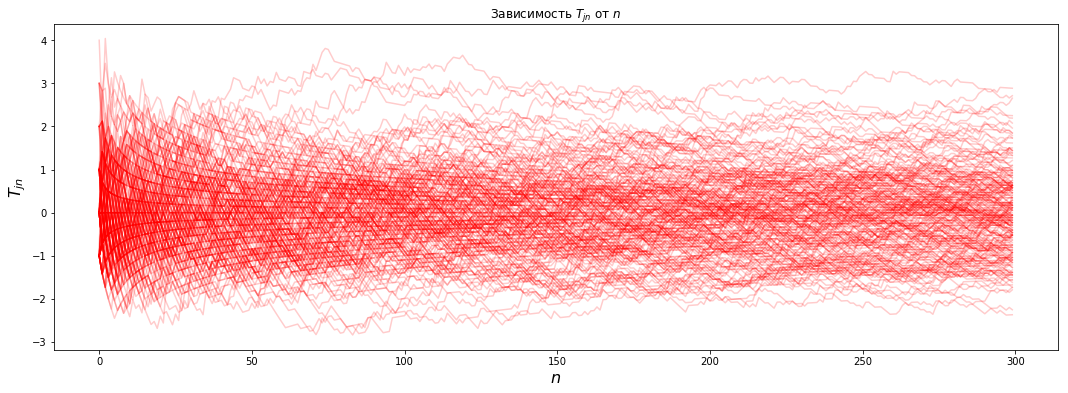

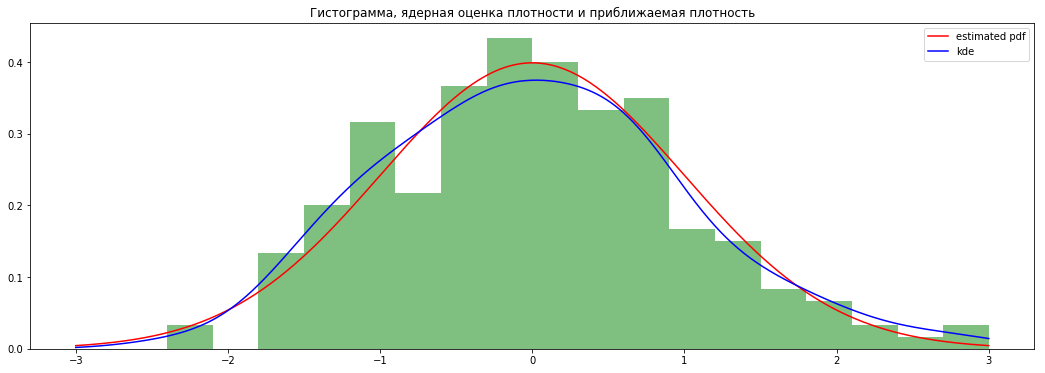

In [13]:
visualize_asympthotic_normality(sample, np.linspace(-3, 3, 600), statistic_values, sps.norm.pdf)

**Вывод:** Оценка асимптотически нормальна, если $\sqrt{n}$, умноженный на разность оценки и точного значения, стремится к величине, распределённой нормально с нулевым средним. Можно применить ЦПТ, так что еще можно сделать вывод об асимптотической дисперсии (она равна 1 в обоих случаях). По гистограммам и ядерным оценкам видно, что оценка похожа на величину со стандартным нормальным распределением.  
По графику с зависимостью $T_{jn}$ от $n$ можно видеть, что ЦПТ выполняется: большинство линий находится на интервале $(-3; 3)$ и чем ближе к нулю, тем больше число линий .

**Задача 4.** Пусть $X_1, ..., X_n$ --- выборка из распределения $U[0, \theta]$. Из домашнего задания известно, что $n\left(\theta - X_{(n)}\right) \stackrel{d_\theta}{\longrightarrow} Exp\left(1/\theta\right)$. Проведите исследование, аналогичное заданию 3 для $\theta=1$.

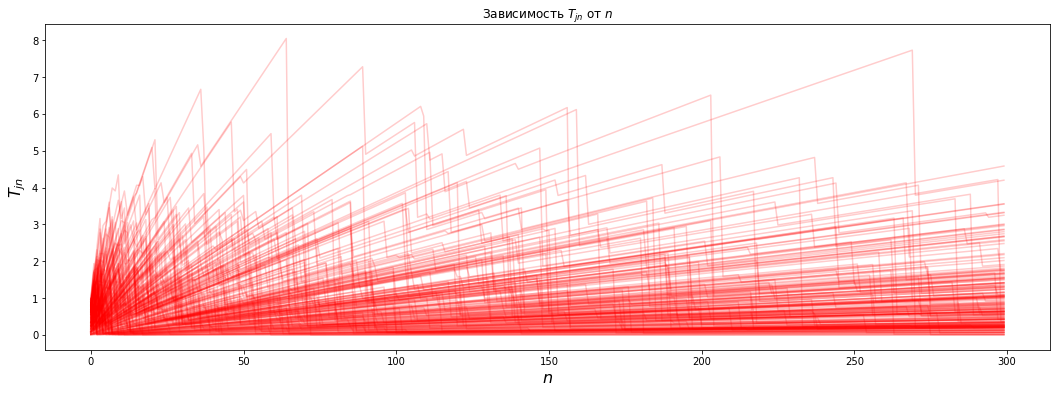

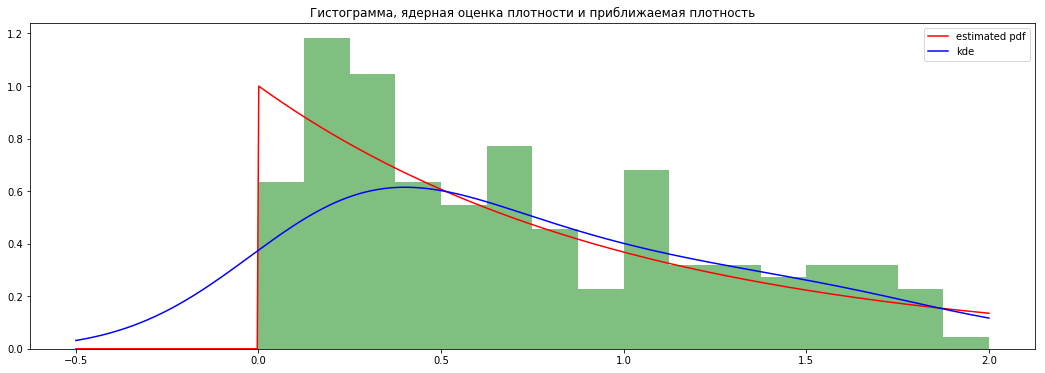

In [14]:
sample = sps.uniform.rvs(size=(200, 300))
estimation_values = np.maximum.accumulate(sample, axis=1)
statistic_values = (1-estimation_values) * np.linspace(1, 300, 300)
visualize_asympthotic_normality(sample, np.linspace(-0.5, 2, 600), statistic_values, sps.expon.pdf)

**Вывод:** Утверждение из условия выполняется: на графике оценки видно, что чем ближе к нулю, тем большее число линий, а гистограмма и ядерная оценка плотности близки к функции плотности вероятности экспоненциального распределения с параметром 1. 

**Задача 5.** Дана параметрическая модель и несколько выборок из двух или трех наблюдений (для удобства они даются в виде python-кода). Нужно для каждой выборки построить график функции правдоподобия.

*a).* Параметрическая модель $\mathcal{N}(\theta, 1)$, выборки: [-1, 1], [-5, 5], [-1, 5]

*b).* Параметрическая модель $Exp(\theta)$, выборки: [1, 2], [0.1, 1], [1, 10]

*c).* Параметрическая модель $U[0, \theta]$, выборки: [0.2, 0.8], [0.5, 1], [0.5, 1.3]

*d).* Параметрическая модель $Bin(5, \theta)$, выборки: [0, 1], [5, 5], [0, 5]

*e).* Параметрическая модель $Pois(\theta)$, выборки: [0, 1], [0, 10], [5, 10]

*f).* Параметрическая модель $Сauchy(\theta)$, где $\theta$ --- параметр сдвига, выборки: [-0.5, 0.5], [-2, 2], [-4, 0, 4]

Выполнить задание, не создавая много кода, поможет следующая функция.

In [15]:
def draw_likelihood(density_function, grid, samples, label):
    ''' density_function --- функция, считающая плотность (обычную или дискретную)
        grid --- сетка для построения графика
        samples --- три выборки
        label --- latex-код параметрической модели
    '''
    
    plt.figure(figsize=(18, 5))
    for i, sample in enumerate(samples):
        sample = np.array(sample)[np.newaxis, :]
        likelihood = density_function(sample).prod(axis=1)  # значение функции правдоподобия

        plt.subplot(1, 3, i+1)
        plt.plot(grid, likelihood)
        plt.xlabel('$\\theta$', fontsize=16)
        plt.grid(ls=':')
        plt.title(label + ', sample=' + str(sample), fontsize=16)
    plt.show()

Первый пункт можно выполнить с помощью следующего кода

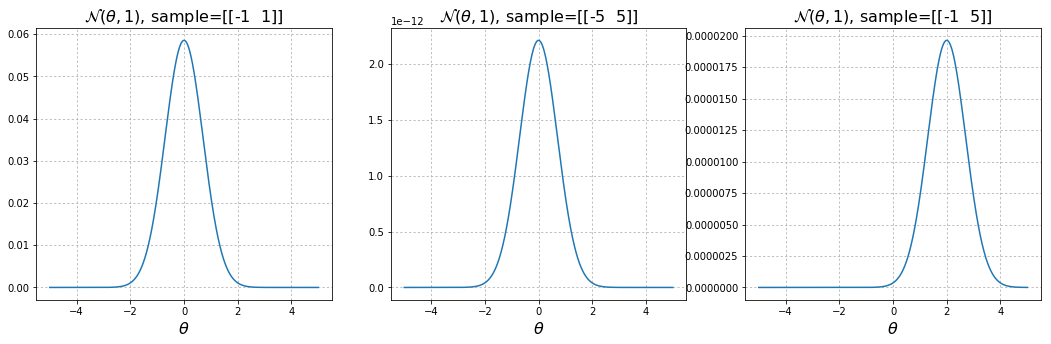

In [16]:
grid = np.linspace(-5, 5, 1000).reshape((-1, 1))
draw_likelihood(sps.norm(loc=grid).pdf, grid, 
                [[-1, 1], [-5, 5], [-1, 5]], '$\\mathcal{N}(\\theta, 1)$')

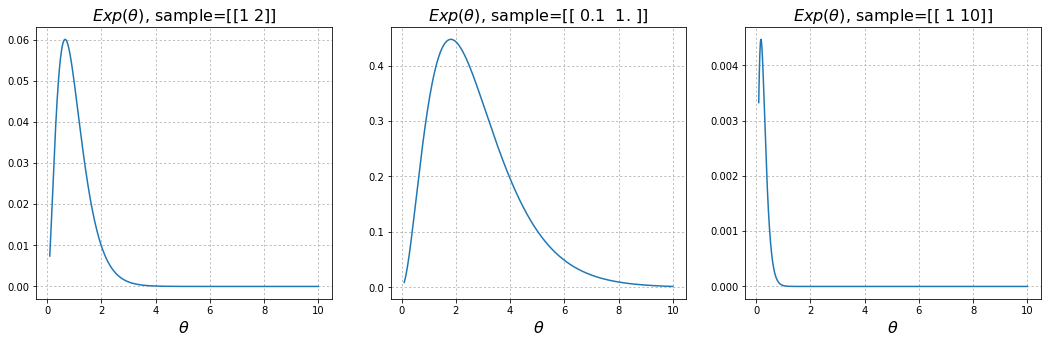

In [17]:
grid = np.linspace(0.1, 10, 1000).reshape((-1, 1))
draw_likelihood(sps.expon(scale=1/grid).pdf, grid, 
                [[1, 2], [0.1, 1], [1, 10]], '$Exp(\\theta)$')

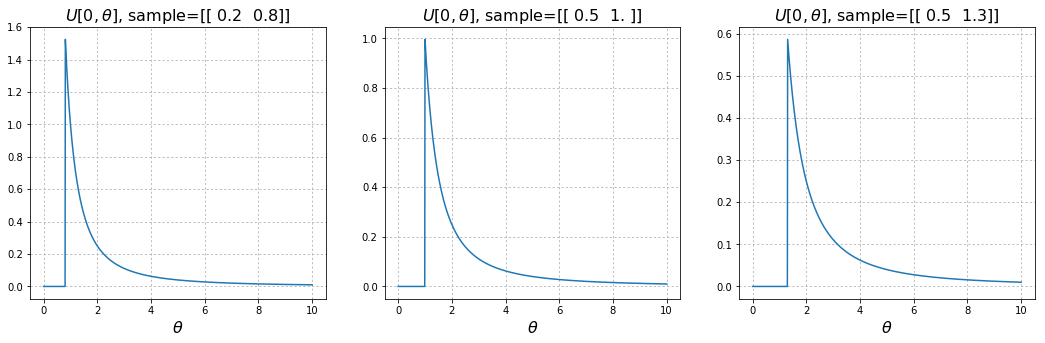

In [18]:
grid = np.linspace(-0.1, 10, 1000).reshape((-1, 1))
draw_likelihood(sps.uniform(loc=0, scale=grid).pdf, grid,
                [[0.2, 0.8], [0.5, 1], [0.5, 1.3]], '$U[0,\\theta]$')

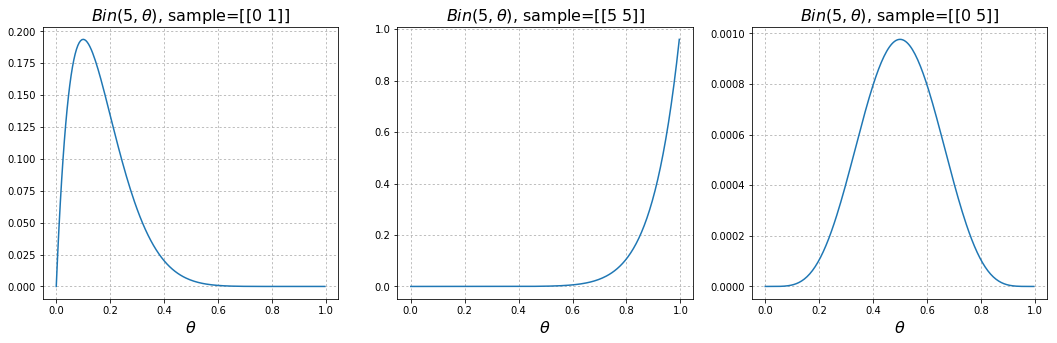

In [19]:
grid = np.linspace(0, 5, 1000).reshape((-1, 1))
draw_likelihood(sps.binom(n=5, p=grid).pmf, grid, 
                [[0, 1], [5, 5], [0, 5]], '$Bin(5,\\theta)$')

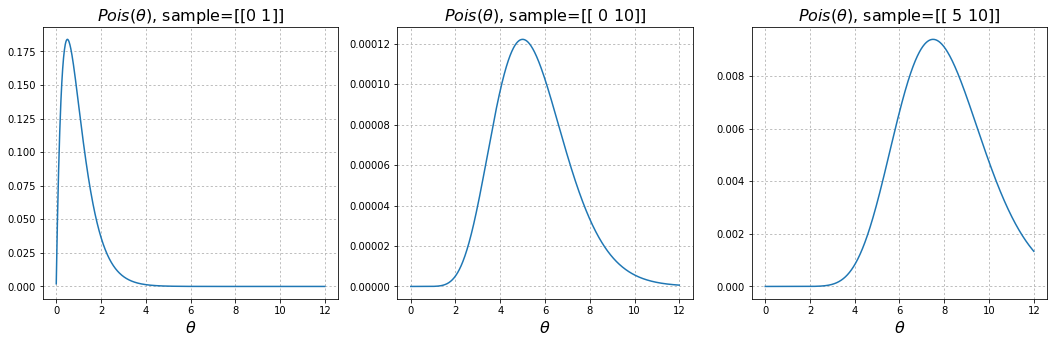

In [20]:
grid = np.linspace(-1, 12, 1000).reshape((-1, 1))
draw_likelihood(sps.poisson(mu=grid).pmf, grid, 
                [[0, 1], [0, 10], [5, 10]], '$Pois(\\theta)$')

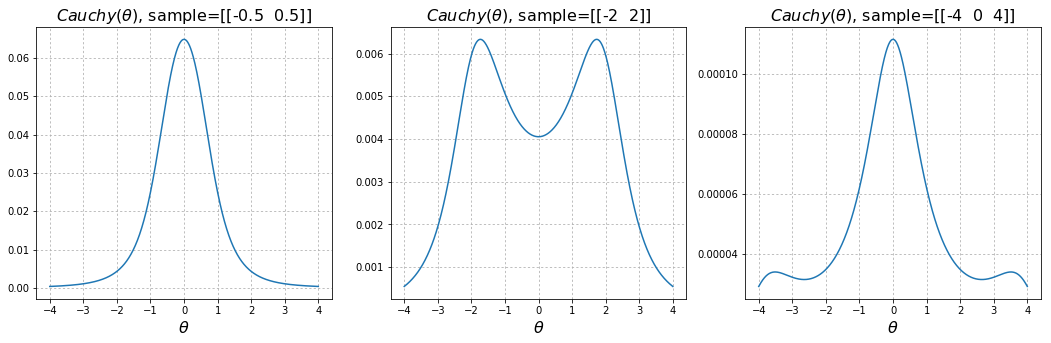

In [21]:
grid = np.linspace(-4, 4, 1000).reshape((-1, 1))
draw_likelihood(sps.cauchy(loc=grid).pdf, grid, 
                [[-0.5, 0.5], [-2, 2], [-4, 0, 4]], '$Cauchy(\\theta)$')

Сделайте вывод о том, как функция правдоподобия для каждой модели зависит от выборки. Является ли функция правдоподобия плотностью?

**Вывод:** Функция правдоподобия при фиксированном $\theta$ зависит от выборки как произведение плотностей. Но сама она не является плотностью, ибо плотность зависит от $x$, а функция правдоподобия от $\theta$.

Сгенерируем выборку большого размера из стандартного нормального распределения и посчитаем ее функцию правдоподобия в модели $\mathcal{N}(\theta, 1)$. Выполните код ниже

In [22]:
sample = sps.norm.rvs(size=10**5)
likelihood = sps.norm.pdf(sample).prod()
print(likelihood)

0.0


Почему результат отличается от ожидаемого? Как обойти эту неприятность для подсчтета оценки максимального правдоподобия? Реализуйте это. *Подсказка:* нужно использовать некоторую функцию у класса, который реализует это распределения.

**Решение:** Значения функции правдоподобия очень малы, ибо они есть произведение плотностей, которые меньше единицы. Из-за неточности вычислений с плавающей точкой результат получается 0, хотя должно быть очень маленькое положительное число. Взамен можно использовать логарифмическую функцию правдоподобия: тогда вместо маленьких положительных чисел будут большие отрицательные, а их можно суммировать без такой потери точности.

In [23]:
sample = sps.norm.rvs(size=10**5)
likelihood = sps.norm.logpdf(sample).sum()
print(likelihood)

-141647.583188


**Задача 6.** 
На высоте 1 метр от точки $\theta$ находится источник $\gamma$-излучения, 
причем направления траекторий $\gamma$-квантов случайны, т.е. равномерно распределены по полуокружности. Регистрируются координаты $X_i, i=1,...,n$ точек пересечения $\gamma$-квантов с поверхностью детекторной плоскости.
Известно, что $X_i$ имеет распределение Коши.

*a).* На отрезке $[-7, 7]$ постройте плотность стандартного нормального распределения и стандартного распределения Коши. Не забудьте добавить легенду.

*b).* Сгенерируйте выборку размера 100 из стандартного распределения Коши. Для всех $n \leqslant 100$ по первым $n$ элементам выборки посчитайте значения $\overline{X}$ и $\widehat{\mu}$ (выборочное среднее и выборочная медиана). На одном графике изобразите зависимость значений этих оценок от $n$. Сделайте вывод.

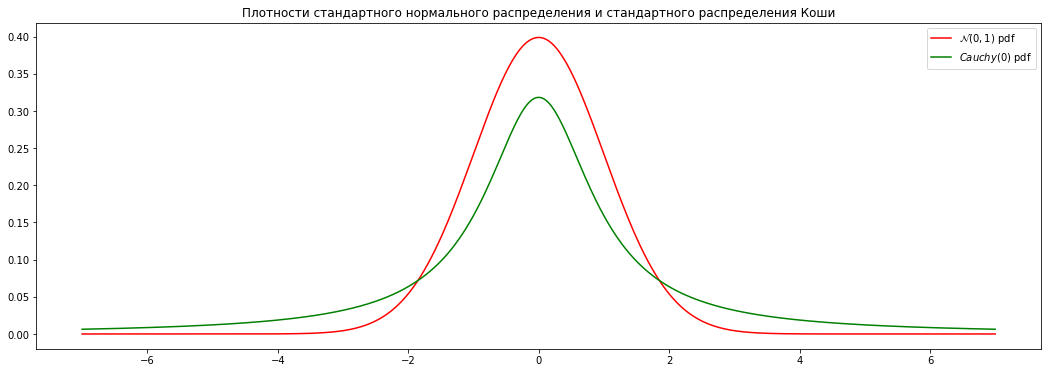

In [24]:
plt.figure(figsize=(18, 6))
grid = np.linspace(-7, 7, 500)

plt.plot(grid, sps.norm.pdf(grid), color='red', label='$\\mathcal{N}(0, 1)$ pdf')
plt.plot(grid, sps.cauchy.pdf(grid), color='green', label='$Cauchy(0)$ pdf')
plt.title('Плотности стандартного нормального распределения и стандартного распределения Коши')
plt.legend()
plt.show()

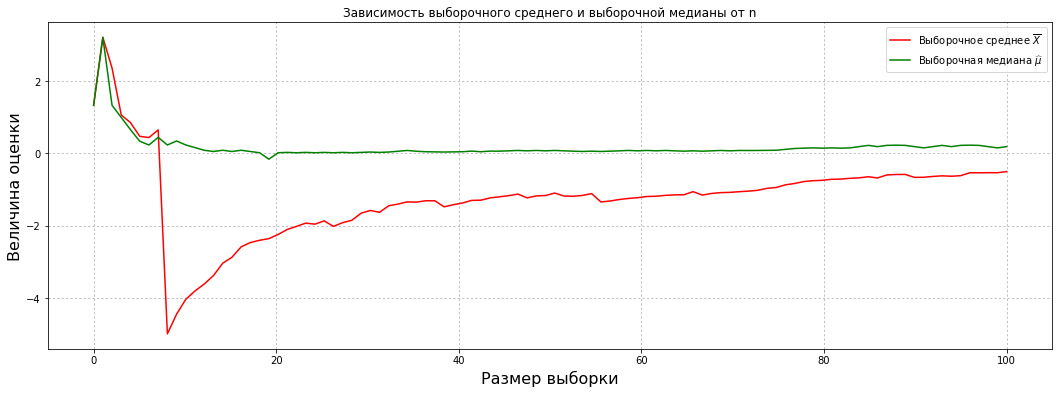

In [29]:
sample = sps.cauchy.rvs(size=100)
sample_average = np.cumsum(sample)/np.arange(1, len(sample)+1, 1)
sample_median = [np.median(sample[:size]) for size in range(1, len(sample)+1)]

plt.figure(figsize=(18, 6))
grid = np.linspace(0, 100, 100)

plt.plot(grid, sample_average, color='red', label='Выборочное среднее $\overline{X}$')
plt.plot(grid, sample_median, color='green', label='Выборочная медиана $\widehat{\mu}$')
plt.title('Зависимость выборочного среднего и выборочной медианы от n')
plt.grid(ls=':')
plt.ylabel('Величина оценки', fontsize=16)
plt.xlabel('Размер выборки', fontsize=16)
plt.legend()
plt.show()

**Вывод:** Распределение Коши является распределением с толстыми хвостами, то есть много вероятностной массы сосредоточено в больших по модулю точках. Выборочное среднее является смещенной оценкой, а медиана — несмещенной, и это видно по графику.

**Задача 7.** На сегодняшний день возобновляемые источники энергии становятся все более востребованными. К таким источникам относятся, например, ветрогенераторы. Однако, их мощность очень трудно прогнозировать. В частности, выработка энергии при помощи ветрогенераторы сильно зависит от скорости ветра. Поэтому предсказание скорости ветра является очень важной задачей. Скорость ветра часто моделируют с помощью распределения Вейбулла, которое имеет плотность
$$p_\theta(x) = \frac{kx^{k-1}}{\lambda^k} e^{-(x/\lambda)^k},$$
где $\theta = (k, \lambda)$ --- двумерный параметр. К сожалению, найти точную оценку максимального правдоподобия на $\theta$ не получится. В данном задании нужно найти оценку максимального правдоподобия приближенно с помощью поиска по сетке.

*Выборка.* Создайте выборку по значению скорости ветра для некоторой местности для не менее чем 100 дней. Помочь в этом может <a href="https://www.gismeteo.ru/diary/">дневник погоды</a>. Однако, данные там округлены до целого, поэтому вы можете попробовать найти другие данные.

*a).* Найдите оценку максимального правдоподобия параметра $\theta = (k, \lambda)$ с точностью $10^{-5}$ при помощи поиска по двумерной сетке.

За распределение Вейбулла отвечает класс `weibull_min` из `scipy.stats`, которое задается так: `weibull_min(c=`$k$ `, scale=`$\lambda$ `)`.

Двумерную сетку можно создать с помощью `numpy.mgrid[from:to:step, from:to:step]`. Если попробовать сразу создать сетку с шагом $10^{-5},$ то может не хватить памяти. Поэтому найдите сначала максимум по сетке с большим шагом, а потом сделайте сетку с маленьким шагом в окрестности найденной точки. При вычислении без циклов, возможно, придется создавать четырехмерные объекты.

Функция `numpy.argmax` выдает не очень информативный индекс, поэтому пользуйтесь следующей функцией.

In [30]:
def cool_argmax(array):
    return np.unravel_index(np.argmax(array), array.shape)

In [ ]:
from bs4 import BeautifulSoup
import urllib.request
import time

In [ ]:
sample = []
for month in range(1, 13):
    page = ''
    with urllib.request.urlopen('http://www.gismeteo.ru/diary/12631/2016/%d/'%month) as f:
        page = f.read()
    soup = BeautifulSoup(page, 'html.parser')
    table = soup.find('table')
    #print(table)
    rows = table.find_all('tr')[2:]
    for row in rows:
        wind_cell = row.find_all('td')[5].span
        if wind_cell is None:
            continue
        wind_str = wind_cell.get_text()
        parsed_arr = wind_str[:-3].split(' ')
        wind_speed = parsed_arr[0] if len(parsed_arr) == 1 else parsed_arr[1]
        print(wind_speed, end=' ')
        sample.append(int(wind_speed))
    time.sleep(0.5)

sample = np.array(sample)

In [31]:
# Из-за того, что данные целочисленные, было слишком мало различных значений скорости ветра, 
# и оценка правдоподобия получалась плохо.
# Пришлось загрузить данные по скорости ветра в Москве за 2012 год.
sample = np.array([13.4,4.5,12.2,7.4,5.7,5.7,14.6,9,14.4,9.1,7.7,8.7,
12.5,2.3,12.5,6,2.9,6.8,7,6.5,8.5,9.3,9.5,7,
9.3,5.4,13.7,8.6,7.7,7,2.2,8.5,5.4,5.8,7.2,4.3,
4.3,2.3,8.7,2.9,11,11,5.2,8.8,3.8,4.8,5.1,8.9,
8.7,2.6,14,1,9.5,6,4.8,2.8,4.6,2,5.5,7.7,
14.5,0.7,11.7,2.5,6.3,2,6.3,3.5,5.8,3,7,9.2,
10,7.5,8,11.1,2.3,6.5,7.5,8.3,3,7.4,7,16.5,
8.7,8.5,6.3,8.4,6.5,4.7,9.7,6.5,3.4,10.3,8.7,10.7,
12.5,2,8,8,8.3,4.5,11.5,4.8,6,9.9,8.2,11.1,
9.7,5.7,5.2,6.3,5.5,1.1,5.1,3.3,6.2,6.3,7.7,14.6,
2.9,3,5.4,3.4,3.3,4.7,4,5.8,1.5,12.6,7.2,11.1,
6.8,7,6,2.6,4,4.3,5.8,5.5,7.5,9.3,6.8,10.5,
8.5,5.3,7.9,3.6,4.9,3.8,1.7,6.2,3.3,10.3,8.5,8.9,
6.3,10.6,9.4,4.4,4.5,4.5,2,8.3,4.5,6.8,5.3,9.7,
6.8,10,5.7,3.3,4.9,4.3,1.7,5.3,5.8,2,5.5,12,
7,6,8,5.3,7.1,4.2,3.7,6.3,5,9.2,6.5,9.5,
9.1,5.5,8.5,4.3,4,3.4,6.3,7,4.2,7.7,3.3,3,
10.8,6.9,10.6,10.3,3.5,7.1,8.3,6.8,11,0.7,2.6,
12.8,4,12,5.1,11.7,9.8,6.3,3.8,7,5.2,5.5,9.2,
12,4.6,12,4.5,9.9,8.5,7.5,2.5,7.7,4.5,7.7,13,
12.3,11.4,13.2,4.8,7.4,6.2,4,3.5,8,9.5,2.5,12.2,
12,4.4,13,7.4,8,3,3,6.5,10.5,9.7,11.2,4.7,
8.3,2.9,7.7,10.8,5.1,3.5,2.5,4,8,7.2,13.7,2.2,
4.6,3.3,12,2.4,5.2,1.7,3.2,3.5,10,5.7,4,
1.4,11.4,8,4.9,6.2,4.8,10.5,0.5,2,7,5.3,4.9,
0.9,8.8,9.6,4.5,3.2,4,7.7,4,2.2,6,4.5,7,
3.7,8.2,5.7,5.8,4.5,3.5,2.6,5.8,2.7,8.2,3.7,6,
6.9,15,5.2,7.1,6.8,6,8.2,6,3.5,13.2,8,8,
10,3.8,6.9,5.5,8.5,9,7.5,6.8,11.2,7.5,12.6,
9.8,10.7,5.4,7,10.3,10,8.8,7,10.5,1.3,13.4,
8.7,11.7,10.2,12.7,6.3,10])

In [32]:
grid_c_limits = (0.001, 20)
grid_scale_limits = (0.001, 20)
accuracy = 1e-5
diff = 10
step = 0.1

optimal_c = None
optimal_scale = None

sample = sample.astype(float)

while step >= accuracy:
    print('С шагом %f'%step)
    c, scale = np.mgrid[grid_c_limits[0]:grid_c_limits[1]+step*0.1:step, 
                        grid_scale_limits[0]:grid_scale_limits[1]+step*0.1:step]
    #print(c)
    arr = np.zeros_like(c)
    c_size, scale_size = arr.shape
    for i in range(c_size):
        for j in range(scale_size):
            arr[i][j] = sps.weibull_min.logpdf(sample, c=c[i][j], scale=scale[i][j]).sum()
    #print(arr)
    #print(arr.shape)
    i, j = cool_argmax(arr)
    optimal_c = c[i][j]
    optimal_scale = scale[i][j]
    print('Оптимальные параметры c=%f, scale=%f'%(optimal_c, optimal_scale))
    grid_c_limits = (c[i][j] - 1.5 * step, c[i][j] + 1.5 * step)
    grid_scale_limits = (scale[i][j] - 1.5 * step, scale[i][j] + 1.5 * step)
    step /= diff

С шагом 0.100000
Оптимальные параметры c=2.301000, scale=7.801000
С шагом 0.010000
Оптимальные параметры c=2.271000, scale=7.731000
С шагом 0.001000
Оптимальные параметры c=2.270000, scale=7.735000
С шагом 0.000100
Оптимальные параметры c=2.270400, scale=7.734800
С шагом 0.000010
Оптимальные параметры c=2.270380, scale=7.734840


Нарисуйте график плотности с параметрами, соответствующим найденным ОМП, а так же нанесите на график гистограмму.

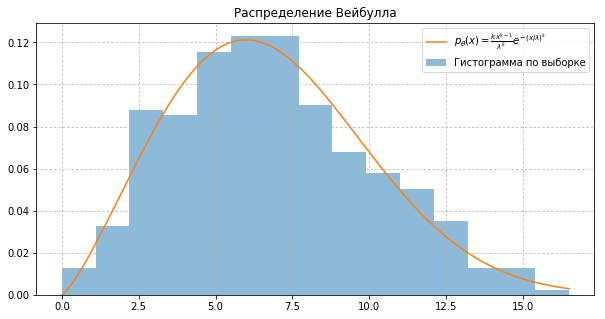

In [33]:
grid = np.linspace(0, sample.max(), 1000)

plt.figure(figsize=(10, 5))
plt.hist(sample,  bins=15, range=(grid.min(), grid.max()), alpha=0.5, normed=True, label='Гистограмма по выборке')
plt.plot(grid, sps.weibull_min(c=optimal_c, scale=optimal_scale).pdf(grid),
         label='$p_\\theta(x) = \\frac{kx^{k-1}}{\\lambda^k} e^{-(x/\\lambda)^k}$') 
plt.title('Распределение Вейбулла')
plt.legend()
plt.grid(ls=':')
plt.show()

*b).*<font size="5" color="red">\*</font> На самом деле, при помощи дифференцирования можно перейти к задаче поиска ОМП для параметра $k$. Выполните такое преобразование и найдите ОМП приближенно с помощью метода Ньютона, основываясь на параграфе 35 книги А.А. Боровкова "Математическая статистика", 2007.

**Задача 8.** 

*a).* Пусть $X_1, ..., X_n$ --- выборка из распределения $U[0, \theta]$. Рассмотрим оценки $2\overline{X}, (n+1)X_{(1)}, X_{(1)}+X_{(n)}, \frac{n+1}{n} X_{(n)}$. Вам необходимо сравнить эти оценки в равномерном подходе с квадратичной и линейной функциями потерь, построив графики функций риска при помощи моделирования.

Для каждого $\theta \in (0, 2]$ с шагом 0.01 сгенерируйте 2000 выборок $X_1^j, ..., X_{100}^j$ из распределения $U[0, \theta]$. По каждой из этих выборок посчитайте значение всех четырех оценок. Тем самым для данного $\theta$ и оценки $\theta^*$ получится 2000 реализаций этой оценки $\theta^*_1, ..., \theta^*_{2000}$, где значение $\theta^*_j$ посчитано по реализации выборки $X_1^j, ..., X_{100}^j$. Теперь можно оценить функцию потерь этой оценки с помощью усреднения
$$\widehat{R}\left(\theta^*, \theta\right) = \frac{1}{2000}\sum\limits\limits_{j=1}^{2000} g\left(\theta^*_j, \theta\right),$$
где $g(x, y)=(x-y)^2$ и $g(x, y)=\left|x-y\right|$.

Нанесите на один график все четыре функции риска. Для каждого типа функции потерь должен быть свой график. Пользуйтесь следующим шаблоном. Ограничение сверху по оси *y* ставьте таким, чтобы графики функции риска с малыми значениями четко различались.

In [ ]:
plt.plot(тета, функция риска, label=latex-метка)
plt.grid(ls=':')
plt.xlabel('$\\theta$', fontsize=16)
plt.ylabel('$\\widehat{R}\\left(\\theta^*, \\theta\\right)$', fontsize=16)
plt.legend(fontsize=14)
plt.title(тип функции потерь, fontsize=16)
plt.ylim((0, ограничение сверху))

Сделайте вывод о том, какая оценка лучше и в каком подходе.

In [36]:
# Функции, которые будут использоваться в обоих пунктах задачи.

def generate_estimations(thetas, distribution, estimation_functions, samples_count=100, sample_size=2000):
    estimations = []
    for estimation_function, label in estimation_functions:
        estimations.append([np.apply_along_axis(
            estimation_function, 0, distribution((samples_count, sample_size), theta))
                            for theta in thetas])
    return np.array(estimations)


def generate_risk_functions(thetas, loss_functions, estimations):
    risk_functions = []
    # Разные подходы
    for loss_function, label in loss_functions:
        risk_functions.append([[loss_function(estimations_for_theta, theta).mean() 
                                for theta, estimations_for_theta in zip(thetas, estimation)]
                               for estimation in estimations])
    return risk_functions


def visualize_risk_functions(loss_functions, estimation_functions, risk_functions, xlim=None, ylim=None):
    if ylim is None:
        ylim = [None]*len(loss_functions)
        
    for loss_function, loss_function_label, risk_functions_for_loss, ylim_for_loss \
            in zip(*zip(*loss_functions), risk_functions, ylim):
        plt.figure(figsize=(16,5))
        for estimation_function, estimation_function_label, risk_function \
                in zip(*zip(*estimation_functions), risk_functions_for_loss):
            plt.plot(thetas, risk_function, label='оценка %s'%estimation_function_label)
            plt.grid(ls=':')
            plt.xlabel('$\\theta$', fontsize=16)
            plt.ylabel('$\\widehat{R}\\left(\\theta^*, \\theta\\right)$', fontsize=16)
            plt.legend(fontsize=14)
            plt.title('%s функция потерь'%loss_function_label, fontsize=16)
            plt.xlim(xlim)
            plt.ylim(ylim_for_loss)
        plt.show()
        
        
loss_functions = [
    [lambda x, y: np.abs(x-y), 'Линейная'],
    [lambda x, y: (x-y)**2, 'Квадратичная']
]

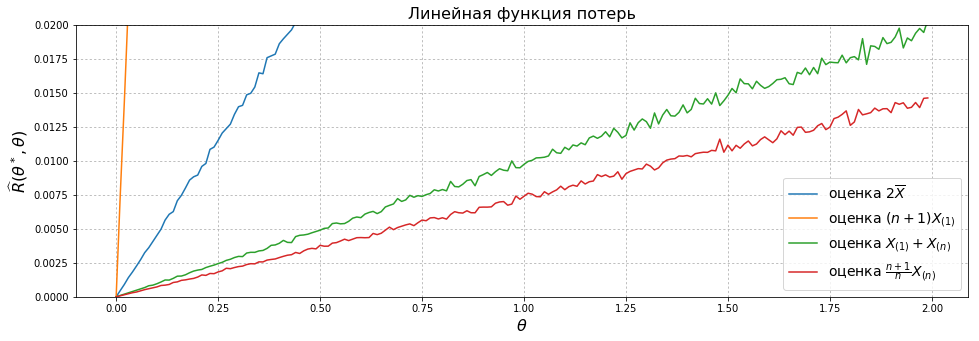

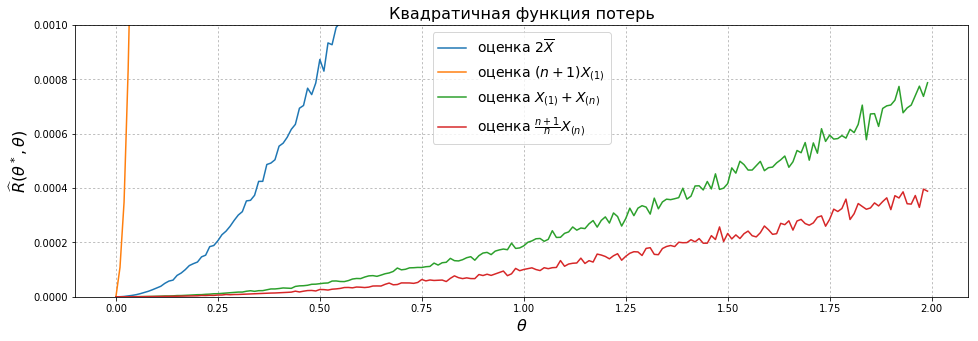

In [37]:
estimation_functions = [
    [lambda sample: 2*np.mean(sample), '$2\\overline{X}$'],
    [lambda sample: (len(sample)+1)*np.min(sample),'$(n+1)X_{(1)}$'],
    [lambda sample: np.min(sample)+np.max(sample),'$X_{(1)}+X_{(n)}$'],
    [lambda sample: (len(sample)+1)/len(sample)*np.max(sample), '$\\frac{n+1}{n} X_{(n)}$']
]
thetas = np.arange(0, 2.0, 0.01)

estimations = generate_estimations(thetas, 
                                   lambda N, theta: sps.uniform.rvs(size=N, loc=0, scale=theta), 
                                   estimation_functions)

risk_functions = generate_risk_functions(thetas, loss_functions, estimations)

visualize_risk_functions(loss_functions, estimation_functions, risk_functions, ylim=((0, 0.02), (0, 0.001)))

**Вывод:** В равномерном подходе как при линейной, так и при квадратичной функции потерь лучше всего несмещенный максимум $\frac{n+1}{n} X_{(n)}$, затем $X_{(1)}+X_{(n)}$, затем удвоенное среднее, и хуже всего $(n+1)X_{(1)}$ минимум. 

*b).* Пусть $X_1, ..., X_n$ --- выборка из распределения $Exp(\theta)$. Для $1 \leqslant k \leqslant 5$ рассмотрим оценки $\left(k! / \overline{X^k}\right)^{1/k}$, которые вы получили в домашнем задании. Проведите исследование, аналогичное пункту *a)*. Используйте цикл по $k$, чтобы не размножать код. Факториалы есть гамма-функция, которая реализована в `scipy.special.gamma`.

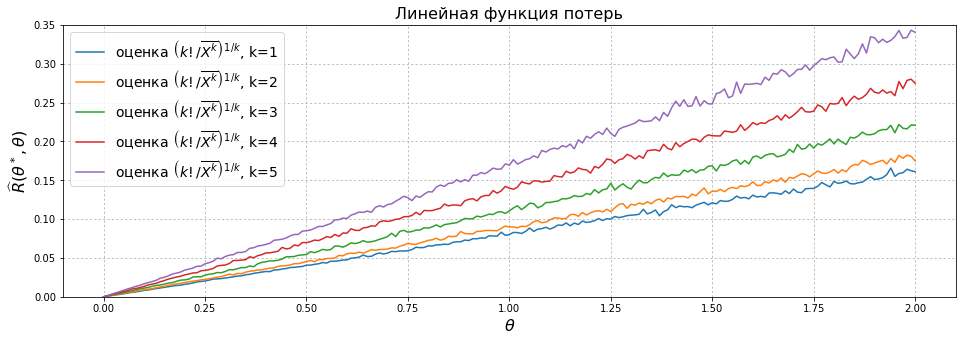

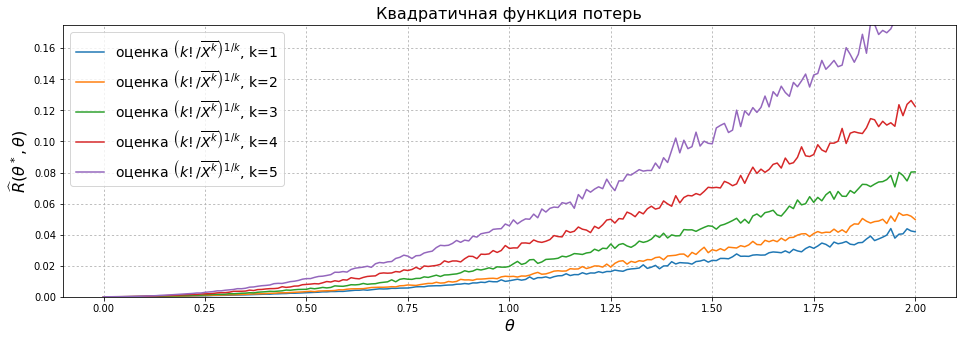

In [38]:
estimation_functions = [[lambda sample, k=k: (sp.special.gamma(k+1)/(np.mean(sample**k)))**(1/k), 
                         '$\\left(k! / \\overline{X^k}\\right)^{1/k}$, k=%d'%k] for k in range(1, 6)]

thetas = np.arange(0.00001, 2.0001, 0.01)

estimations = generate_estimations(thetas, 
                                   lambda N, theta: sps.expon.rvs(size=N, scale=1/theta),
                                   estimation_functions)

risk_functions = generate_risk_functions(thetas, loss_functions, estimations)

visualize_risk_functions(loss_functions, estimation_functions, risk_functions, 
                         ylim=((0, 0.35), (0, 0.175)))

**Вывод:** В равномерном подходе как при линейной, так и при квадратичной функции потерь чем меньше $k$, тем лучше оценка.

**Задача 9<font size="5" color="red">\*</font>.** Пусть $\theta^*$ --- оценка параметра $\theta$ и $R\left(\theta^*, \theta\right) = \mathsf{E}_{\theta} \left(\theta^* - \theta\right)^2$ --- функция риска с квадратичной функцией потерь. Тогда справедливо bias-variance разложение
$$R\left(\theta^*, \theta\right) = bias^2(\theta^*, \theta) + variance(\theta^*, \theta) ,$$
$$bias(\theta^*, \theta) = \mathsf{E}_{\theta} \theta^* - \theta,$$
$$variance(\theta^*, \theta) = \mathsf{D}_{\theta} \theta^*.$$

*a).* Пусть $X_1, ..., X_n$ --- выборка из распределения $U[0, \theta]$. Рассмотрим класс оценок $\mathscr{K} = \left\{cX_{(n)}, c\in\mathbb{R}\right\}$. Выпишите bias-variance разложение для таких оценок.

По домашнему заданию знаем, что $\mathsf{E}_{\theta} X_{(n)} = \frac{n}{n+1} \theta$. Оттуда же $\mathsf{E}_{\theta} X_{(n)}^2 = c^2 \int\limits_0^\theta x^2 \frac{n!}{(n-1)!0!} (\frac{x}{\theta})^{n-1}(1-\frac{x}{\theta})^0 \frac{1}{\theta} dx = \int\limits_0^\theta \frac{nx^{n+1}}{\theta^{n}} dx = \frac{n \theta^{n+2}}{(n+2)\theta^{n}} = \frac{n\theta^2}{n+2}$

$bias(\theta^*, \theta)^2 = (\mathsf{E}_{\theta} \theta^* - \theta)^2 = (c\mathsf{E}_{\theta} X_{(n)} - \theta)^2 = \theta^2(\frac{n}{n+1}c-1)^2$

$variance(\theta^*, \theta) = \mathsf{D}_{\theta} \theta^* = c^2 (\mathsf{E}_{\theta} X_{(n)}^2 - (\mathsf{E}_{\theta} X_{(n)})^2) = c^2\theta^2 ( \frac{n}{n+2} - (\frac{n}{n+1})^2) = \theta^2 \frac{c^2n}{(n+1)^2(n+2)}$

$R\left(\theta^*, \theta\right) = bias^2(\theta^*, \theta) + variance(\theta^*, \theta) ,$

Заметим, что каждая компонента bias-variance разложения пропорциональна $\theta^2$. Это означает, достаточно рассмотреть поведение компонент при изменении $c$ только для одного значения $\theta$.

Постройте график зависимости компонент bias-variance разложения от $c$ для $n=5$ и $\theta=1$. С помощью функций `plt.xlim` и `plt.ylim` настройте видимую область графика так, чтобы четко была отобажена информативная часть графика (по оси *x* примерно от 0.9 до 1.3). Не забудьте добавить сетку и легенду, а так же подписать оси.

Сделайте выводы. Какая $c$ дает минимум функции риска? Является ли соответствующая оценка смещеной? Что можно сказать про несмещенную оценку?

In [44]:
def draw_bias_variance_decomposition(grid, bias2, variance, xlim, ylim, additional_actions=None, additional_title=''):
    risk = bias2 + variance
    min_risk = np.argmin(risk)

    if additional_actions is not None:
        additional_actions()
    plt.plot(grid, bias2, label='$bias^2$', color='green')
    plt.plot(grid, variance, label='$variance$', color='blue')
    plt.plot(grid, risk, label='$R$', color='red', lw=3)
    plt.grid(ls=':')
    plt.xlabel('$c$', fontsize=16)
    plt.ylabel('$Риск$', fontsize=16)
    plt.legend()
    plt.title('bias-variance разложение функции риска'+additional_title, fontsize=16)
    plt.vlines(grid[min_risk], 0, risk[min_risk], color='black',
               linestyles='dashed', alpha=0.75, linewidth=1)
    plt.xlim(xlim)
    plt.ylim(ylim)

    print('c = {}'.format(grid[min_risk]))
    print('bias^2(c) = {} != 0'.format(bias2[min_risk]))

c = 1.1666666666666667
bias^2(c) = 0.0007716049382715995 != 0


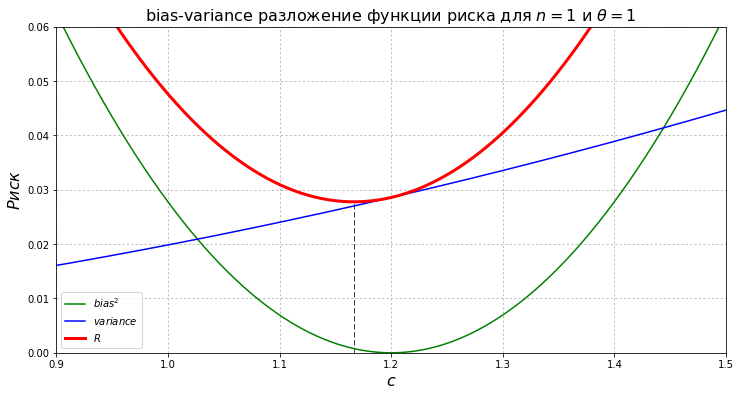

In [45]:
n = 5
theta = 1
grid = np.linspace(0.75, 1.5, 1000)
bias2 = (theta ** 2) * (grid * n / (n + 1) - 1) ** 2
variance = (theta ** 2) * ((grid ** 2) * n / ((n + 2) * (n + 1) ** 2))
plt.figure(figsize=(12, 6))
draw_bias_variance_decomposition(grid, bias2, variance, (0.9, 1.5), (0, 0.06), additional_title=' для $n=1$ и $\\theta=1$')
plt.show()

**Вывод:** Видно, что функция риска достигает минимума при ненулевом bias'е. Это означает, что наилучшая оценка в равномерном подходе не всегда является несмещённой. 

Найдём, при каком $c$ функция риска минимальна. 

$\frac{d}{dc} (\theta^2(\frac{n}{n+1}c-1)^2 + \theta^2 \frac{c^2n}{(n+1)^2(n+2)}) = \theta^2 (2(\frac{nc}{n+1} -1)\frac{n}{n+1}+2\frac{2cn}{(n+1)^2(n+2)}) = \frac{2n\theta^2}{(n+1)^2}(nc-n-1+\frac{c}{n+2})=0$

$(nc-n-1)(n+2)+c=0, c(n^2+2n+1)=n^2+3n+2, c = \frac{n+2}{n+1}$

У нас $c \approx 1.166...$, что соответствует $\frac{n+2}{n+1} = \frac{7}{6}$

*b).* Пусть $X_1, ..., X_n$ --- выборка из распределения $\mathcal{N}(0, \sigma^2)$. Рассмотрим класс оценок $\mathscr{K} = \left\{\frac{1}{c}\sum\limits\limits_{i=1}^n \left(X_i - \overline{X}\right)^2, c\in\mathbb{R}\right\}$. Выпишите bias-variance разложение для таких оценок. Можно использовать то, что величина $\frac{nS^2}{\sigma^2}$ имеет распределение хи-квадрат с $n-1$ степенью свободы (это будет доказано в нашем курсе позже) и ее дисперсия равна $2(n-1)$.

Знаем: $E_{\sigma^2}s^2 = \frac{n-1}{n} \sigma^2 $

$ bias^2 = (E_{\sigma^2}(\sigma^2)^* - \sigma^2)^2 = (\frac{n}{c}E_{\sigma^2}s^2 - \sigma^2)^2 =(\frac{n-1}{c}-1)^2\sigma^4$

$ variance = D_{\sigma^2}(\sigma^2)^* = D_{\sigma^2} \frac{ns^2}{c} = \frac{\sigma^4}{c^2} D_{\sigma^2} \frac{ns^2}{\sigma^2} = 2(n-1)\frac{\sigma^4}{c^2} $

Повторите исследование, аналогичное пункту *a)* для $sigma^2 = 1$ и $n \in \{5, 10\}$. Для экономии места нарисуйте два графика в строчку. Не забудьте сделать выводы.

c = 6.006006006006006
bias^2(c) = 0.22177800000000003 != 0
c = 11.003003003003002
bias^2(c) = 0.14867914060563303 != 0


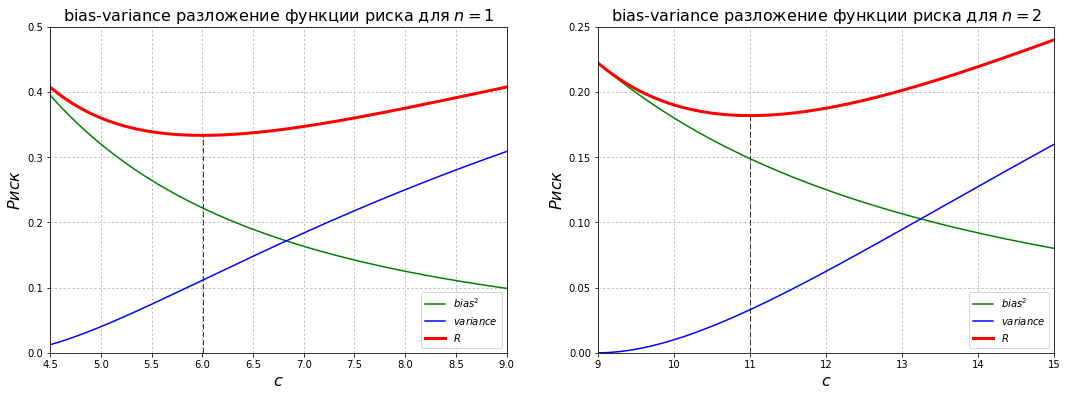

In [46]:
sigma = 1
plt.figure(figsize=(18, 6))
for i, (n, xlim, ylim) in enumerate([[5, (4.5, 9), (0, 0.5)], [10, (9, 15), (0, 0.25)]]):
    
    grid = np.linspace(4, 16, 1000)
    bias2 = 2 * (n - 1) * (sigma ** 4) / (grid ** 2)
    variance = (((n-1) / grid - 1) ** 2) * (sigma ** 4)
    draw_bias_variance_decomposition(grid, bias2, variance, xlim, ylim, lambda:plt.subplot(1, 2, i+1), ' для $n=%d$'%(i+1))
plt.show()

**Вывод:** 

$\frac{d}{dc} (\frac{n-1}{c}-1)^2\sigma^4 + 2(n-1)\frac{\sigma^4}{c^2} = -2\sigma^4((n-1)\frac{2}{c^3}+(\frac{n-1-c}{c^3}) = 0$

$2(n-1)+(n-1-c)(n-1)=0, 2n-2+n^2-n-n+1-cn+c=0, n^2-1=c(n-1), c=n+1$

Это видно на графике. Наилучшая оценка смещена.

**Задача 10<font size="5" color="red">\*</font>.** Разберитесь с теорией параграфа 4 главы 6 книжки М.Б. Лагутина "Наглядная математическая статистика", 2009. Проведите соответствующее исследование.

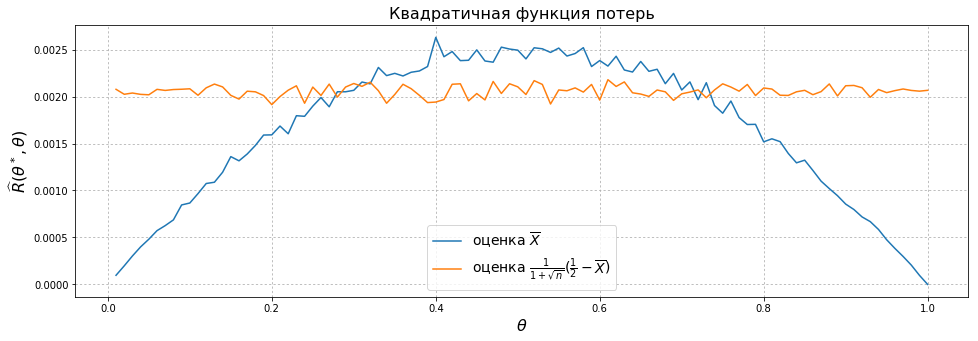

In [47]:
estimation_functions = [
    [lambda sample: np.mean(sample), '$\\overline{X}$'],
    [lambda sample: np.mean(sample) + 1/(1+np.sqrt(len(sample)))*(1/2-np.mean(sample)),
     '$\\frac{1}{1+\\sqrt{n}}(\\frac{1}{2}-\\overline{X})$']
]

loss_functions = [
    [lambda x, y: (x-y)**2, 'Квадратичная']
]

thetas = np.arange(0.01, 1.001, 0.01)

estimations = generate_estimations(thetas, lambda N, theta: sps.bernoulli.rvs(size=N, p=theta), 
                                   estimation_functions, sample_size=2000)

risk_functions = generate_risk_functions(thetas, loss_functions, estimations)

visualize_risk_functions(loss_functions, estimation_functions, risk_functions)

Обозначим $p(\theta) = P(|\theta^*-\theta|<|\overline{X}-\theta|)$ — вероятность того, что оценка Ходжеса-Лемана окажется лучше, чем выборочное среднее.
Тогда если при наступлении этого события получаем $C$, а при ненаступлении теряем $C$, то ожидание выигрыша $Cp(\theta)+(-C)[1-p(\theta)] = 2C[p(\theta)-\frac{1}{2}]$, то есть играть выгодно при $p(\theta) > \frac{1}{2}$. 

In [48]:
N = 10000
thetas = np.linspace(0, 1, N)
n = 9
hodges_lehmann = estimation_functions[0][0]
average = estimation_functions[1][0]

hodges_lehmann_better = 0
mean_better = 0
for theta in thetas:
    sample = sps.bernoulli(p=theta).rvs(n)

    if np.abs(hodges_lehmann(sample) - theta) < np.abs(average(sample) - theta):
        hodges_lehmann_better += 1
    else:
        mean_better += 1
        
print('В %d случаев Ходжес-Леман лучше, в %d — выборочное среднее'%(hodges_lehmann_better, mean_better))
print('Разница %f'%(np.abs(hodges_lehmann_better-mean_better)/N))

В 4898 случаев Ходжес-Леман лучше, в 5102 — выборочное среднее
Разница 0.020400


**Вывод:** оценка Ходжеса-Лемана выигрывает примерно в 50% случаев.